In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense,LSTM,GRU

In [2]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

x_train = pad_sequences(x_train,maxlen=100)
x_test = pad_sequences(x_test,maxlen=100)

In [3]:
# Deep RNN
model=Sequential([
    Embedding(10000,32,input_length=100), # Embedded layer to convert word to vector
    SimpleRNN(5,return_sequences=True),
    SimpleRNN(5),
    Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 5)            190       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5)                 55        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 320251 (1.22 MB)
Trainable params: 320251 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 22s 26ms/step - loss: 0.6479 - accuracy: 0.6051 - val_loss: 0.5196 - val_accuracy: 0.7595
Epoch 2/10
782/782 [==============================] - 22s 28ms/step - loss: 0.4501 - accuracy: 0.7948 - val_loss: 0.5243 - val_accuracy: 0.7462
Epoch 3/10
782/782 [==============================] - 22s 28ms/step - loss: 0.3165 - accuracy: 0.8718 - val_loss: 0.4859 - val_accuracy: 0.7913
Epoch 4/10
782/782 [==============================] - 21s 27ms/step - loss: 0.2253 - accuracy: 0.9155 - val_loss: 0.5245 - val_accuracy: 0.7908
Epoch 5/10
782/782 [==============================] - 20s 26ms/step - loss: 0.1593 - accuracy: 0.9440 - val_loss: 0.5667 - val_accuracy: 0.7915
Epoch 6/10
782/782 [==============================] - 23s 30ms/step - loss: 0.1214 - accuracy: 0.9600 - val_loss: 0.6674 - val_accuracy: 0.7777
Epoch 7/10
782/782 [==============================] - 22s 28ms/step - loss: 0.0951 - accuracy: 0.9697 - val_loss: 0.7127 - val_accuracy:

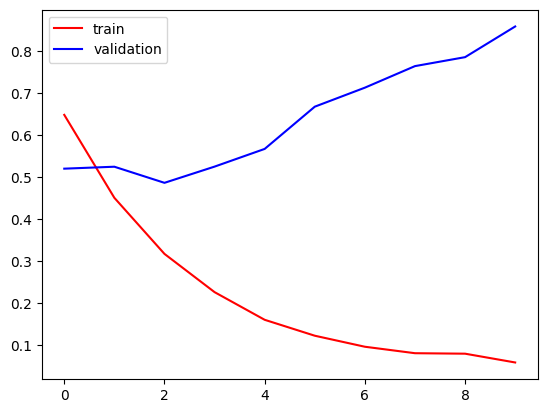

In [16]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [9]:
# Deep LSTM
model_lstm=Sequential([
    Embedding(10000,32,input_length=100), # Embedded layer to convert word to vector
    LSTM(5,return_sequences=True),
    LSTM(5),
    Dense(1,activation='sigmoid')
])

model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 100, 5)            760       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 220       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320986 (1.22 MB)
Trainable params: 320986 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history_lstm = model_lstm.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 36s 46ms/step - loss: 0.0687 - accuracy: 0.9821 - val_loss: 0.5703 - val_accuracy: 0.8208
Epoch 2/10
782/782 [==============================] - 36s 47ms/step - loss: 0.0593 - accuracy: 0.9851 - val_loss: 0.6491 - val_accuracy: 0.8278
Epoch 3/10
782/782 [==============================] - 36s 46ms/step - loss: 0.0523 - accuracy: 0.9871 - val_loss: 0.6310 - val_accuracy: 0.8284
Epoch 4/10
782/782 [==============================] - 33s 42ms/step - loss: 0.0443 - accuracy: 0.9898 - val_loss: 0.6482 - val_accuracy: 0.8284
Epoch 5/10
782/782 [==============================] - 35s 45ms/step - loss: 0.0467 - accuracy: 0.9883 - val_loss: 0.7444 - val_accuracy: 0.8245
Epoch 6/10
782/782 [==============================] - 36s 46ms/step - loss: 0.0351 - accuracy: 0.9924 - val_loss: 0.6729 - val_accuracy: 0.8281
Epoch 7/10
782/782 [==============================] - 34s 44ms/step - loss: 0.0310 - accuracy: 0.9938 - val_loss: 0.7645 - val_accuracy:

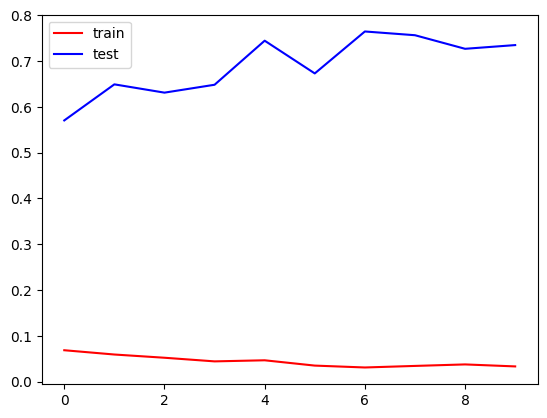

In [20]:
plt.plot(history_lstm.history['loss'],color='red',label='train')
plt.plot(history_lstm.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [22]:
# GRU Models

model_gru=Sequential()

model_gru.add(Embedding(10000,32,input_length=100))
model_gru.add(GRU(5,return_sequences=True))
model_gru.add(GRU(5))
model_gru.add(Dense(1,activation='sigmoid'))

model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 32)           320000    
                                                                 
 gru_2 (GRU)                 (None, 100, 5)            585       
                                                                 
 gru_3 (GRU)                 (None, 5)                 180       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320771 (1.22 MB)
Trainable params: 320771 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model_gru.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history_gru = model_gru.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/10
782/782 [==============================] - 39s 45ms/step - loss: 0.5017 - accuracy: 0.7518 - val_loss: 0.3843 - val_accuracy: 0.8352
Epoch 2/10
782/782 [==============================] - 41s 52ms/step - loss: 0.3051 - accuracy: 0.8770 - val_loss: 0.3571 - val_accuracy: 0.8494
Epoch 3/10
782/782 [==============================] - 36s 46ms/step - loss: 0.2267 - accuracy: 0.9163 - val_loss: 0.4297 - val_accuracy: 0.8217
Epoch 4/10
782/782 [==============================] - 36s 46ms/step - loss: 0.1801 - accuracy: 0.9368 - val_loss: 0.4095 - val_accuracy: 0.8420
Epoch 5/10
782/782 [==============================] - 38s 48ms/step - loss: 0.1355 - accuracy: 0.9566 - val_loss: 0.4786 - val_accuracy: 0.8322
Epoch 6/10
782/782 [==============================] - 40s 51ms/step - loss: 0.1050 - accuracy: 0.9676 - val_loss: 0.5246 - val_accuracy: 0.8301
Epoch 7/10
782/782 [==============================] - 37s 47ms/step - loss: 0.0796 - accuracy: 0.9785 - val_loss: 0.6128 - val_accuracy:

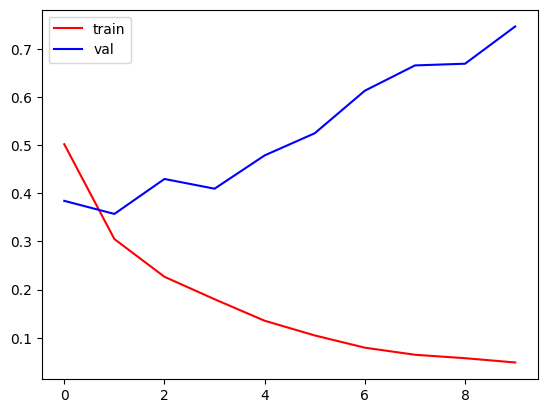

In [26]:
plt.plot(history_gru.history['loss'],color='red',label='train')
plt.plot(history_gru.history['val_loss'],color='blue',label='val')
plt.legend()
plt.show()